In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
from statsmodels.graphics.regressionplots import influence_plot
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv(r"D:\DS\5. Multiple Linear Regression\50_Startups.csv")

In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

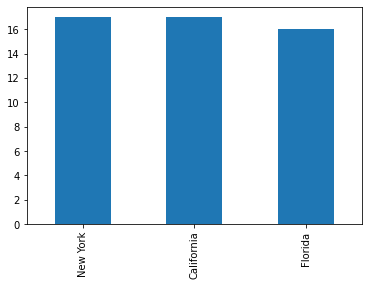

In [19]:
df["State"].value_counts().plot(kind="bar")

In [20]:
df1 = df.drop("State",axis=1)

In [21]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [23]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [24]:
cor = df1.corr()


<AxesSubplot:>

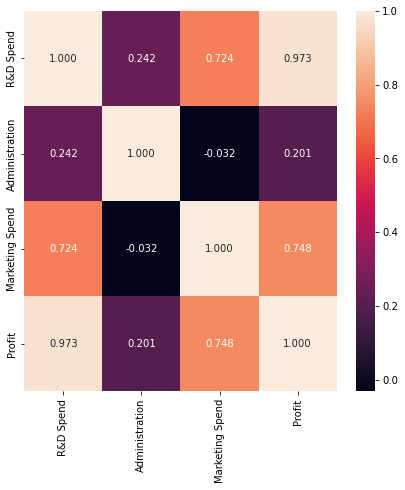

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(cor,annot=True,fmt=".3f")


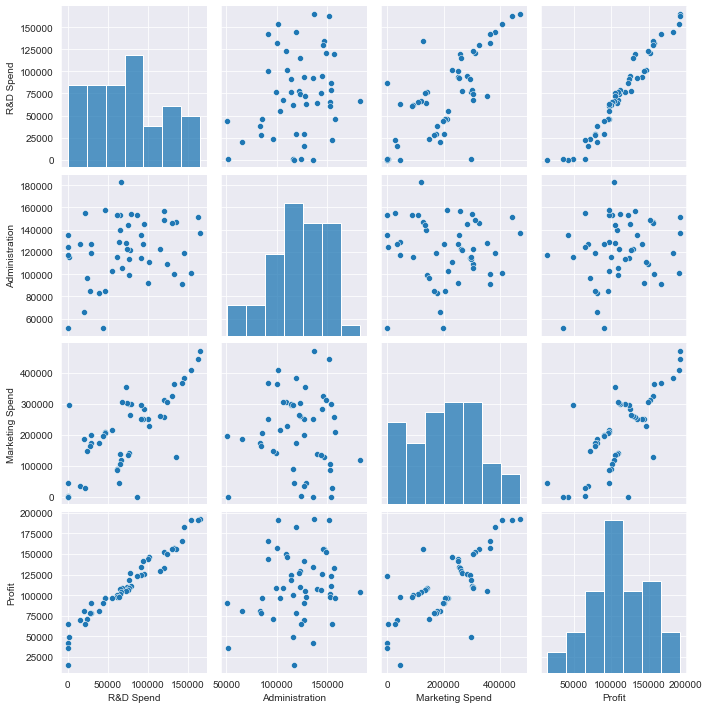

In [26]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)
plt.show()

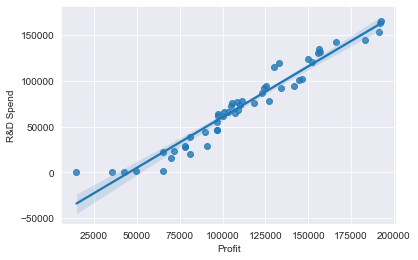

In [27]:
sns.regplot(x='Profit', y='R&D Spend', data= df1)
plt.show()

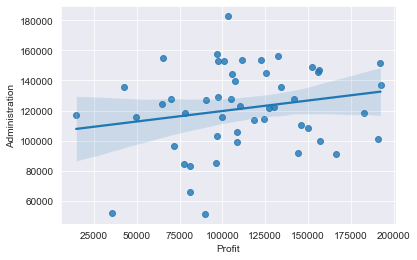

In [28]:
sns.regplot(x='Profit', y='Administration', data= df1)
plt.show()

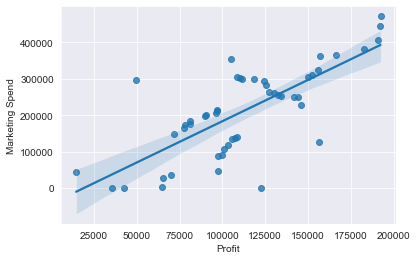

In [29]:
sns.regplot(x='Profit', y='Marketing Spend', data= df1)
plt.show()

# MODEL BUILDING

# Using sklearn

In [30]:
x = df1.drop('Profit', axis=1).values
y=df1.iloc[:,3].values.reshape(-1,1)

In [31]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [32]:
ypred= model.predict(x)
ypred

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

In [33]:
model.rank_

3

In [34]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [35]:
model.intercept_

array([50122.19298987])

In [36]:
r2_score(y, ypred)

0.9507459940683246

# Prediction

In [38]:
df_pred = pd.DataFrame({"R&D Spend":153450, "Administration":134300, "Marketing Spend":472000}, index=[0])
df_pred

,R&D Spend,Administration,Marketing Spend
0,153450,134300,472000


In [39]:
pred =model.predict(df_pred)
print("The Profit will be:", pred)

The Profit will be: [[183009.42943001]]


# Using Stats.ols

In [40]:
df2 = df1.rename({"R&D Spend":"RnDS", "Administration":"ADMN","Marketing Spend":"MS"}, axis=1)


In [41]:
model1 = smf.ols("Profit~RnDS+ADMN+MS", data=df2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        14:10:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnDS           0.8057      0.045     17.846      0.000       0.715       0.897
ADMN          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test For Normality of Residuals

In [42]:
import statsmodels.api as smf 


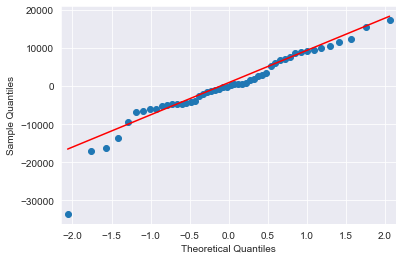

In [43]:
qplot = smf.qqplot(model1.resid, line="q")


# Residual plot for Homoscedasticity


In [44]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()  # User defined z = (x - µ)/σ


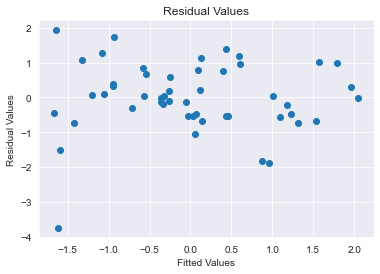

In [45]:
plt.scatter(standard_values(model1.fittedvalues), standard_values(model1.resid))
plt.title("Residual Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residual Values")
plt.show()

# Residuals Vs Regressor


eval_env: 1


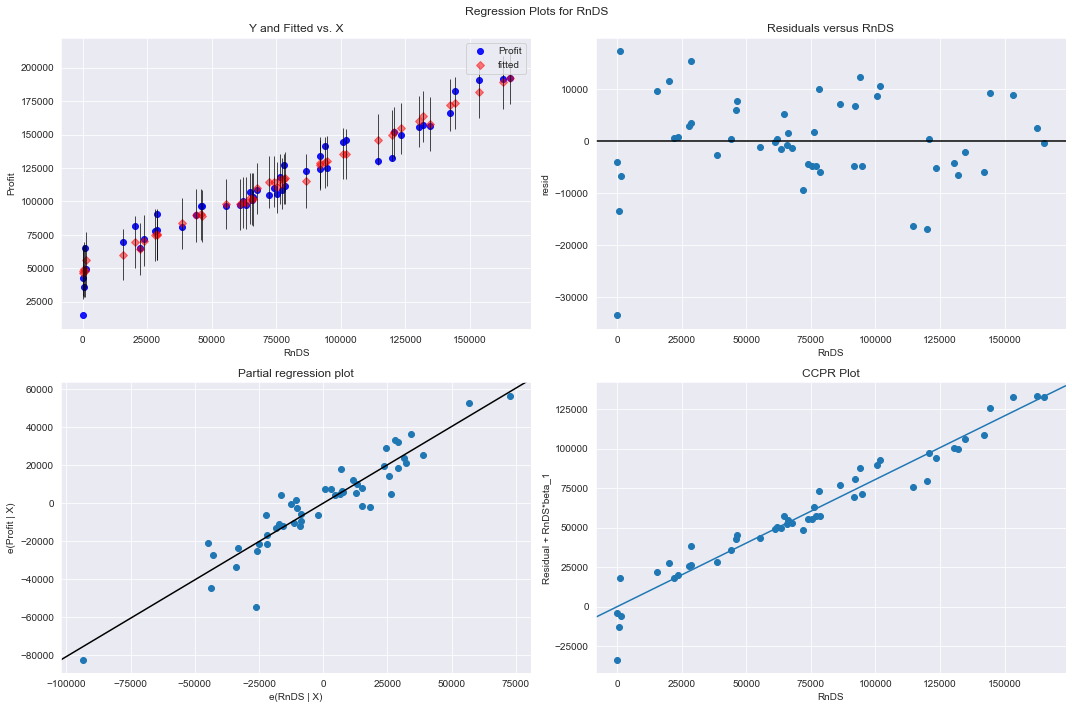

In [46]:
fig= plt.figure(figsize=(15,10))
smf.graphics.plot_regress_exog(model1,"RnDS" ,fig= fig)
plt.tight_layout()
plt.show()

eval_env: 1


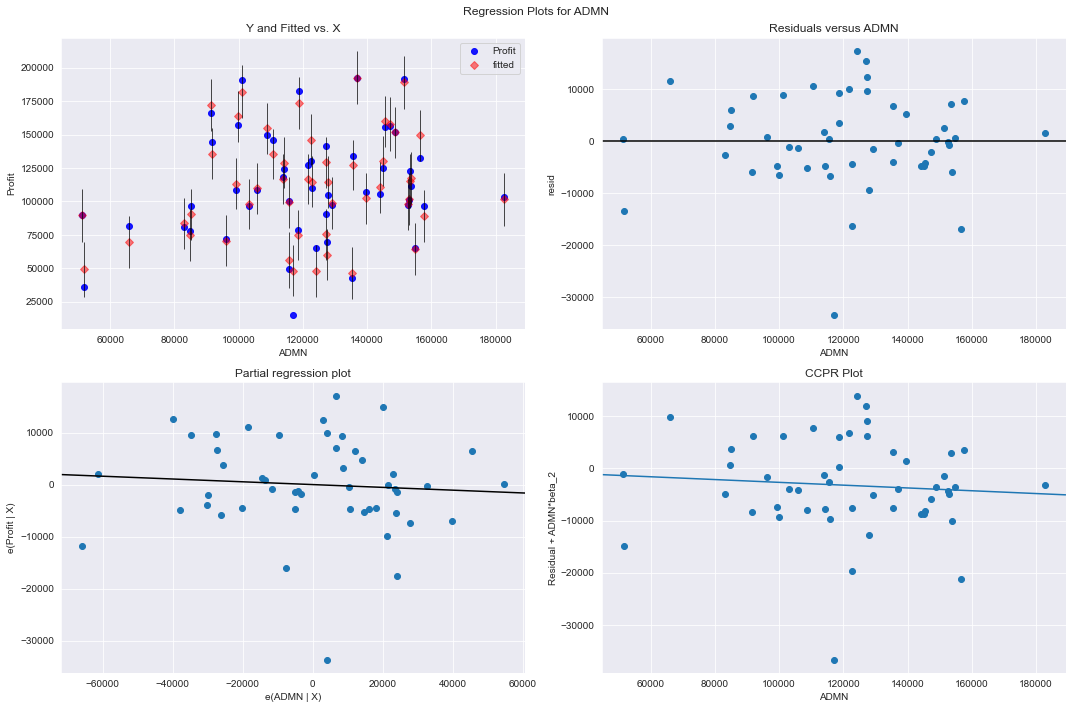

In [47]:
fig1 = plt.figure(figsize=(15,10))
smf.graphics.plot_regress_exog(model1,"ADMN", fig=fig1 )
plt.tight_layout()
plt.show()

eval_env: 1


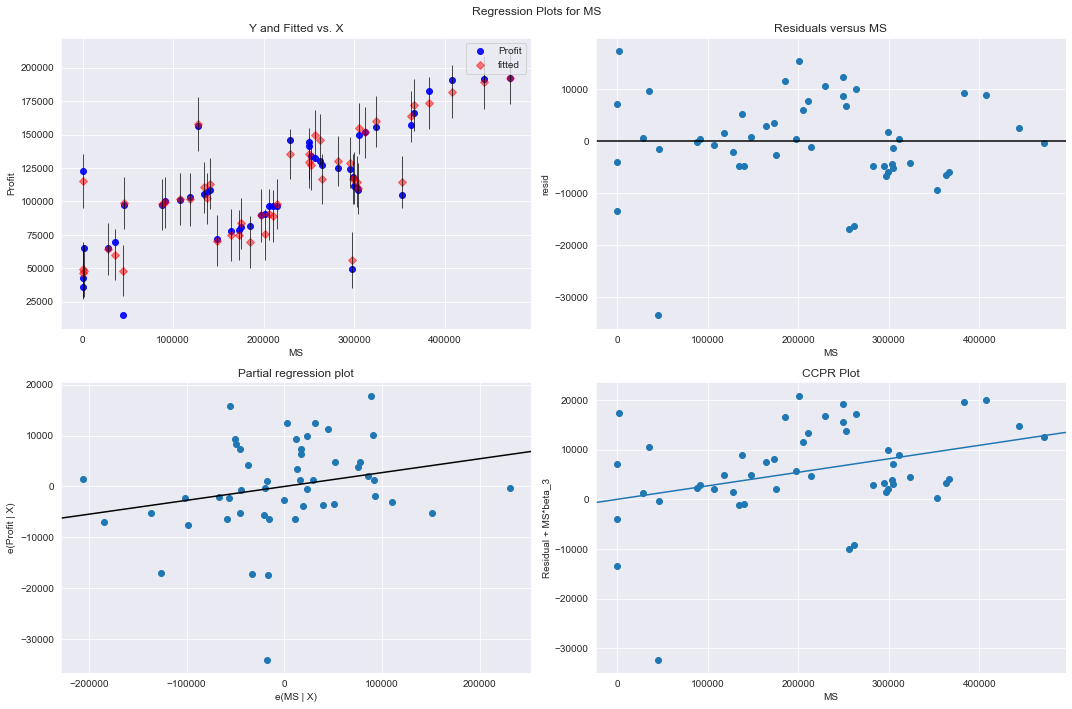

In [49]:
fig2 = plt.figure(figsize=(15,10))
smf.graphics.plot_regress_exog(model1, "MS", fig=fig2)
plt.tight_layout()

# Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 1. Cook's Distance & 2. Leverage value


In [50]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

(c,_)= model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

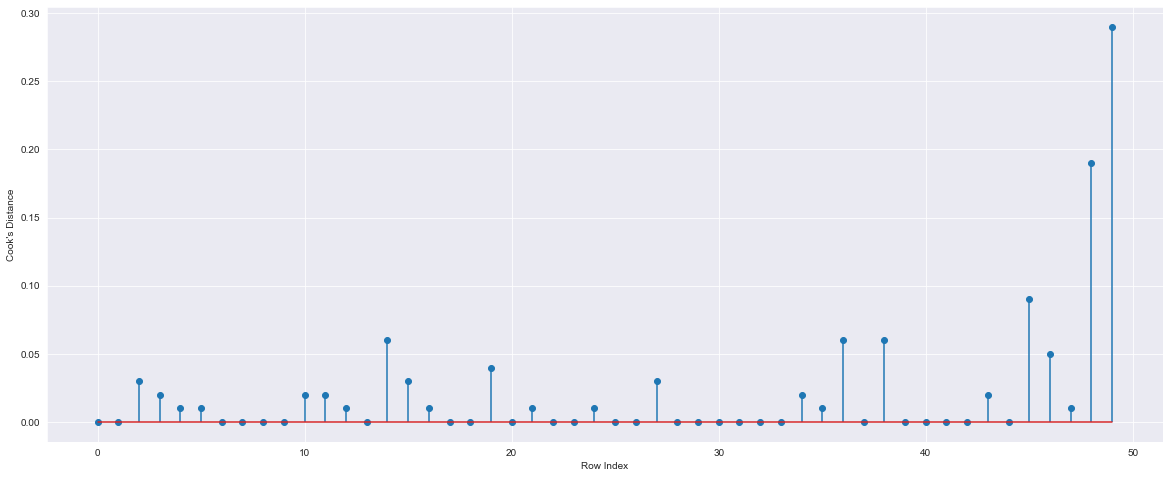

In [51]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df2)), np.round(c,2))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()


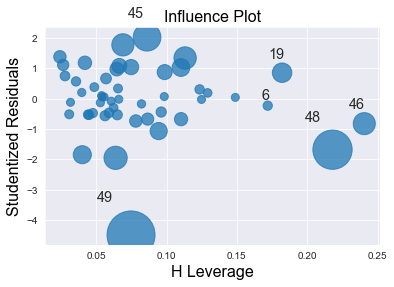

In [52]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model1)
plt.show()

In [53]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

# Since the value is <1,we dosent need to do the diagnostic process and finalize the model

In [54]:
model1.rsquared, model1.aic


(0.9507459940683246, 1058.7714985998055)

In [55]:
model1.params

Intercept    50122.192990
RnDS             0.805715
ADMN            -0.026816
MS               0.027228
dtype: float64